# Policy
* 이 노트북 파일은 중간/팀/개인 과제를 재현Reproduce하는 증거로 활용.
    * 따라서, 이 노트북에 기재된 코드를 실행했을 때, Kaggle에 제출한 결과와 일치해야함
    * 무작위성 등으로 인하여 결과가 매번 달라지는 경우에는 Random Seed 등을 설정해서 항상 같은 결과가 나오도록 할 것(예. scikit-learn의 **random_state** 등)
* 다음과 같은 정책을 어길 시 0점 처리되니 유의할 것
    * 노트북에 기재된 코드를 전체 실행했을 때 오류 등으로 실행이 되지 않는 경우
    * 노트북에 명시되지 않은 별도의 코드 및 라이브러리를 사용하는 경우
        * 과제 수행에 필요한 외부 라이브러리 설치 명령은 이 노트북 내에 명시할 것(Installing Libraries 참조)
        * 별도의 Python 파일은 사용하지 말 것. 필요하다면 이 노트북 내에서 구현.
    * 중간 과제에서 제공한 데이터 이외의 별도의 데이터를 사용하는 경우
    * 노트북 파일 내에서 훈련된 모델이 아닌 다른 모델을 사용하는 경우
    * Kaggle 제출 결과와 노트북 파일 실행으로 나온 결과가 크게 다를 경우

# Installing Libraries

아래에 중간 과제를 수행하는 데 필요한 라이브러리 들을 설치하는 명령어를 넣을 것
예를 들어,
```shell
%conda install sklearn
```
또는
```shell
%pip install -U sklearn
```
버전이 중요하다면, 버전도 명확하게 명시할 것
```shell
%conda install sklearn==1.4.2
```
또는
```shell
%pip install sklearn==1.4.2
```

In [1]:
# 설치하는 라이브러리 명시
!pip install -q scikit-learn numpy pandas altair kaggle==1.6.6 graphviz imbalanced-learn plotly optuna tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [2]:
import os
from os import path
import json

import glob
import pandas as pd
import numpy as np
from tensorflow import keras

import tensorflow as tf
tf.random.set_seed(42)

# Data Load
아래에 중간 과제에 활용할 데이터를 불러오는 부분을 넣을 것

In [3]:
USERNAME = "liebenholz" # username
USERKEY = "" # key

In [4]:
json.dump({'username': USERNAME, 'key': USERKEY}, open('kaggle.json', mode='w'))

In [5]:
!mkdir ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c 2024-knu-ml-ind-asmt5
!unzip 2024-knu-ml-ind-asmt5.zip

100% 1.40G/1.40G [00:25<00:00, 101MB/s]
100% 1.40G/1.40G [00:25<00:00, 59.1MB/s]
Archive:  2024-knu-ml-ind-asmt5.zip
  inflating: img/1.jpg               
  inflating: img/10.jpg              
  inflating: img/100.jpg             
  inflating: img/1000.jpg            
  inflating: img/1001.jpg            
  inflating: img/1002.jpg            
  inflating: img/1003.jpg            
  inflating: img/1004.jpg            
  inflating: img/1005.jpg            
  inflating: img/1006.jpg            
  inflating: img/1007.jpg            
  inflating: img/1008.jpg            
  inflating: img/1009.jpg            
  inflating: img/101.jpg             
  inflating: img/1010.jpg            
  inflating: img/1011.jpg            
  inflating: img/1012.jpg            
  inflating: img/1013.jpg            
  inflating: img/1014.jpg            
  inflating: img/1015.jpg            
  inflating: img/1016.jpg            
  inflating: img/1017.png            
  inflating: img/1018.jpg            
  inflati

In [6]:
# pd.read_csv(...)
import pandas as pd

LABEL = pd.read_csv('./train_label.csv', index_col='id')
SAMPLE = pd.read_csv('./sample_submission.csv', index_col='id')

# Data Preprocessing, Feature Engineering, and Model Building

이곳부터는 데이터 전처리, 특성값 공학, 모델 훈련 등의 코드를 자유롭게 넣을 것

In [7]:
# Write your code freely

## 1. Data Exploration

In [8]:
print(LABEL.shape)
LABEL.head()

(1385, 1)


,label
id,
1084,1
565,0
2481,1
1593,0
447,1


In [9]:
LABEL["label"].value_counts(normalize=True)

label
0    0.510469
1    0.489531
Name: proportion, dtype: float64

In [10]:
!ls

2024-knu-ml-ind-asmt5.zip  img	kaggle.json  sample_data  sample_submission.csv  train_label.csv


In [11]:
print(SAMPLE.shape)
SAMPLE.head()

(1386, 1)


,label
id,
809,-1
1078,-1
273,-1
1978,-1
2589,-1


## 2. Training File Sort by Category

우선 모든 이미지의 포맷을 .jpg로 통일하자.

In [12]:
import os
from PIL import Image

def convert_images_to_jpg(directory):
    count = 0;
    for filename in os.listdir(directory):
        if filename.endswith(".png"):
            img_path = os.path.join(directory, filename)
            try:
                img = Image.open(img_path)
                img.convert("RGB").save(img_path.replace(os.path.splitext(img_path)[1], ".jpg"))
                # print(f"Converted {filename} to JPG")
                count += 1
            except Exception as e:
                print(f"Error converting {filename}: {e}")
    print(f"{count} png images are convrted to jpg.")

image_directory = 'img'
convert_images_to_jpg(image_directory)

568 png images are convrted to jpg.


In [13]:
import os

dir = "img"
png = os.listdir(dir)

for item in png:
    if item.endswith(".png"):
        os.remove(os.path.join(dir, item))

main_dir = "img"
sub_dir_main = os.listdir(main_dir)
file_count = len(sub_dir_main)
print(file_count)

2771


Train Data에 들어있는 Label에 따라 폴더를 생성하고, 훈련용 이미지를 분류하도록 하자.

In [14]:
import pandas as pd
import os
import shutil
from PIL import Image

# train_label.csv 파일 읽기
df = pd.read_csv('train_label.csv')

In [15]:
import pandas as pd
import os
import shutil
from PIL import Image

# train_label.csv 파일 읽기
df = pd.read_csv('train_label.csv')

# 레이블별 폴더 생성
os.makedirs('img/train/0', exist_ok=True)
os.makedirs('img/train/1', exist_ok=True)

# 이미지 분류
for index, row in df.iterrows():
    img_id = row['id']
    label = row['label']

    # 이미지 파일 경로
    img_path = os.path.join('img', str(img_id) + '.jpg')


    # 레이블에 따라 폴더로 이동
    if label == 0:
        shutil.move(img_path, 'img/train/0')
    elif label == 1:
        shutil.move(img_path, 'img/train/1')

다음과 같이 '0'과 '1' Label에 따라 폴더가 생성되고, 그 안에 훈련용 데이터 사진들이 이동한다.

In [16]:
data_dir = "img/train"
sub_dir = os.listdir(data_dir)
sub_dir

['1', '0']

## 3. Image Plotting : size 320*320

### 3-1. For Training

In [17]:
IMG_CHANNELS = 1 # COLOR

doom_color = '#B9121B'  # Red color for Doom theme
ac_color = '#3CAEA3'  # Green color for Animal Crossing theme

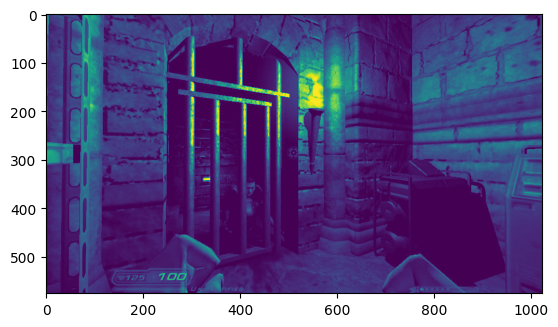

In [18]:
import matplotlib.pyplot as plt
import cv2

categories = ['0', '1']

for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [19]:
print(img_array)

[[124 128 124 ...  34  42  47]
 [125 129 124 ...  35  42  47]
 [127 130 125 ...  36  43  47]
 ...
 [ 14  14  14 ...   0   0   0]
 [ 13  13  13 ...   0   0   0]
 [ 13  13  13 ...   3   3   3]]


In [20]:
img_array.shape

(576, 1024)

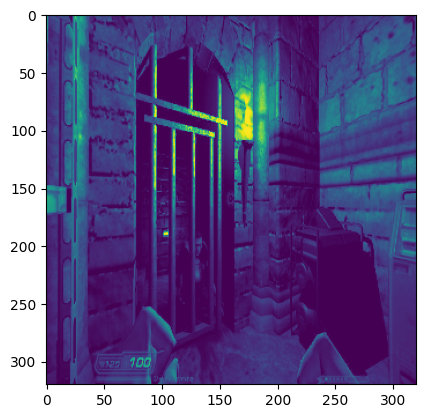

In [21]:
IMG_SIZE = 320
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

훈련용 데이터의 이미지 데이터를 이미지 배열로 변환한다.

In [22]:
training_data = []

def create_training_data():
    for category in categories:
        path = os.path.join(data_dir, category)
        category_count = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, category_count])
            except Exception as e:
                pass

create_training_data()

In [23]:
print(len(training_data))

1385


개수가 train data의 수와 일치한다.

### 3-2. For Testing

In [24]:
main_dir = "img"
sub_dir_main = os.listdir(main_dir)
file_count = len(sub_dir_main)
print(file_count)
# sub_dir_main

1387


같은 작업을 추측할 데이터 이미지에도 진행하되, Labeling이 존재하지 않으므로 'img' 폴더 내에서 진행한다.

단, 'sample-submission.csv'의 id 순서와 동일하게 데이터를 저장해야 한다.

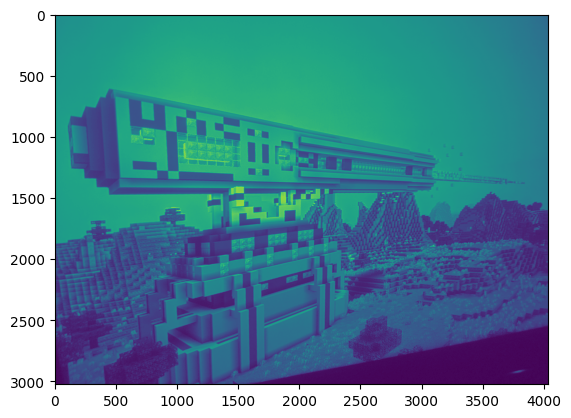

In [25]:
for img in os.listdir(main_dir):
    img_array = cv2.imread(os.path.join(main_dir, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    break

In [26]:
print(img_array)

[[111 116 121 ...  85  86  89]
 [116 119 123 ...  86  88  92]
 [118 120 121 ...  87  89  94]
 ...
 [  2   2   3 ...   2   2   3]
 [  2   3   6 ...   3   2   1]
 [  3   5   9 ...   3   1   0]]


In [27]:
img_array.shape

(3024, 4032)

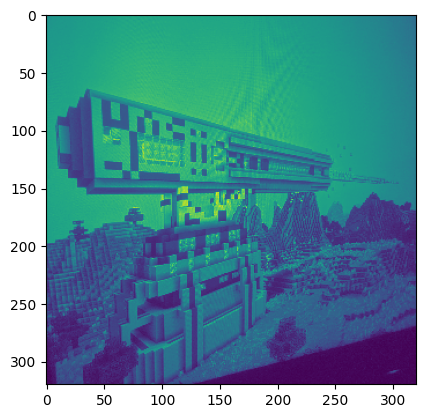

In [28]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [29]:
df = SAMPLE
evaluation_data = []
label = 0

# CSV 파일의 인덱스 순서대로 이미지 로드
for image_id in df.index:
    image_path = os.path.join(main_dir, str(image_id) + '.jpg')  # 이미지 파일 경로 생성
    # print(image_path)

    try:
        # 이미지 로드 및 크기 조정
        img = keras.utils.load_img(image_path)

        img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        evaluation_data.append([new_array, label])

    except Exception as e:
        pass


In [30]:
print(len(evaluation_data))

1386


## 4. Separating Features and Label

In [31]:
import random

random.shuffle(training_data)

In [32]:
train_x = []
train_y = []

for features, label in training_data:
    train_x.append(features)
    train_y.append(label)

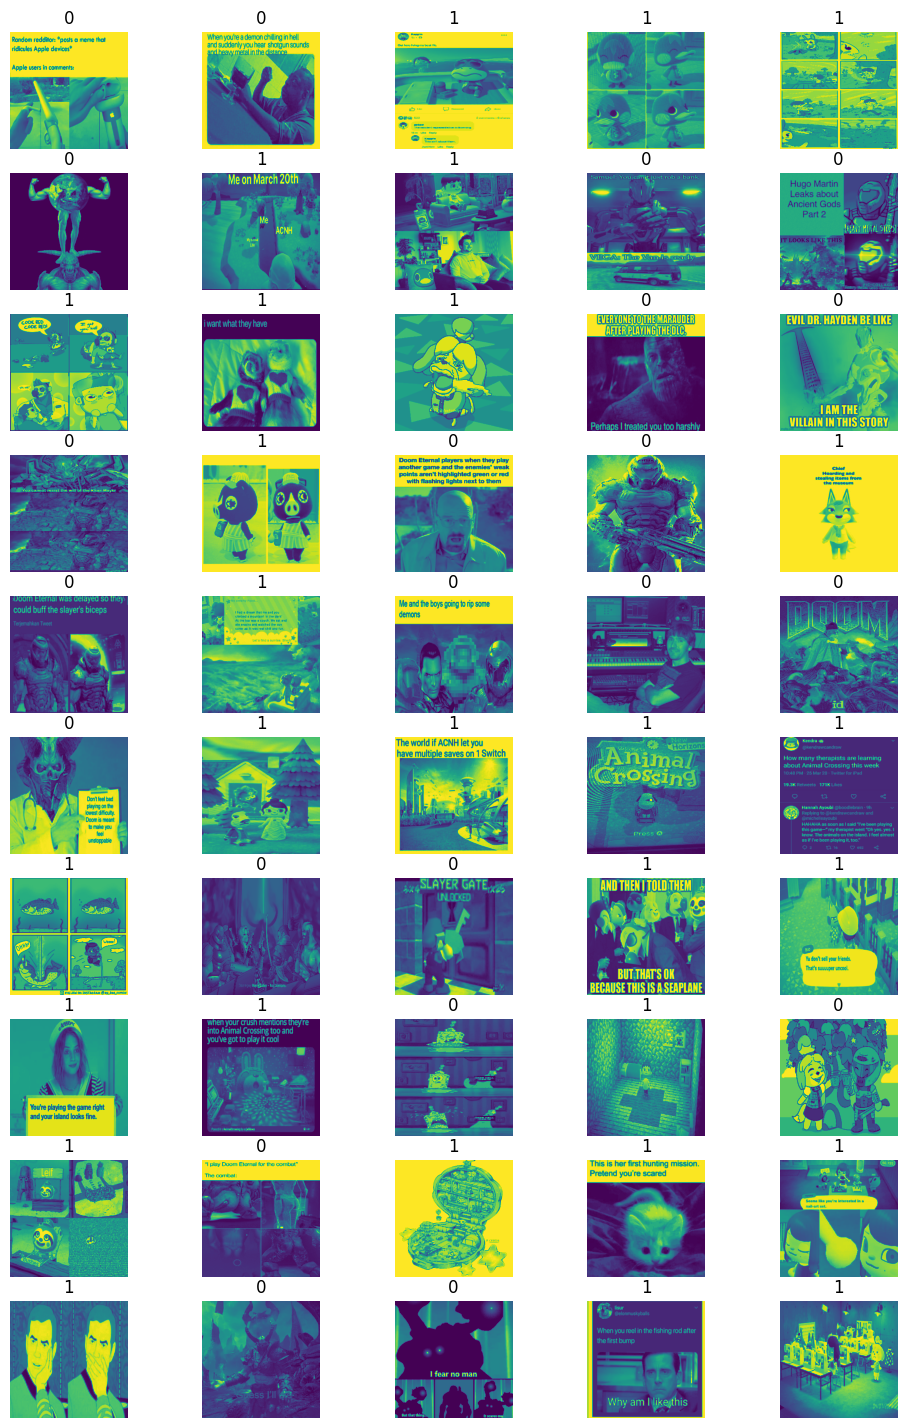

In [33]:
fix, axes = plt.subplots(nrows=10, ncols=5, figsize=(12,18))
axes = axes.flatten()
for i,ax in zip(range(50), axes):
    ax.imshow(train_x[i])
    ax.set_title(categories[train_y[i]])
    ax.axis("off")

plt.show()

In [34]:
from tensorflow.keras.utils import plot_model, to_categorical

train_x = np.array(train_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
train_y = to_categorical(train_y)
train_x.shape, train_y.shape

((1385, 320, 320, 1), (1385, 2))

In [35]:
eval_x = []
eval_y = []

for features, label in evaluation_data:
    eval_x.append(features)
    eval_y.append(label)

In [36]:
from tensorflow.keras.utils import plot_model, to_categorical

eval_x = np.array(eval_x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
eval_y = to_categorical(eval_y)
eval_x.shape, eval_y.shape

((1386, 320, 320, 1), (1386, 1))

## 4. Model Compiling and Training

In [37]:
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

IMG_SHAPE = (IMG_SIZE, IMG_SIZE, IMG_CHANNELS)

model = models.Sequential()

# Add the layers
model.add(layers.Flatten(input_shape=(IMG_SHAPE)))

model.add(layers.Dense(3200, activation='relu'))
model.add(layers.Dense(1600, activation='relu'))
model.add(layers.Dense(800, activation='relu'))
model.add(layers.Dense(400, activation='relu'))
model.add(layers.Dense(200, activation='relu'))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(50, activation='relu'))

model.add(layers.Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [38]:
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint

NAME = "Doom-Crossing"
checkpoint_path = "train_ckpt/cp.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))
callbacks_list = ([checkpoint], [tensorboard])

model.fit(train_x, train_y, epochs=20, batch_size=100, shuffle=True, validation_split=0.33, callbacks=callbacks_list, verbose=1)

Epoch 1/20
10/10 [==============================] - ETA: 0s - loss: 6203.3354 - accuracy: 0.5070 
Epoch 1: val_accuracy improved from -inf to 0.55459, saving model to train_ckpt/cp.ckpt
10/10 [==============================] - 195s 20s/step - loss: 6203.3354 - accuracy: 0.5070 - val_loss: 2155.6814 - val_accuracy: 0.5546
Epoch 2/20
10/10 [==============================] - ETA: 0s - loss: 1761.5984 - accuracy: 0.5081
Epoch 2: val_accuracy did not improve from 0.55459
10/10 [==============================] - 106s 10s/step - loss: 1761.5984 - accuracy: 0.5081 - val_loss: 270.0319 - val_accuracy: 0.5546
Epoch 3/20
10/10 [==============================] - ETA: 0s - loss: 190.5843 - accuracy: 0.4822 
Epoch 3: val_accuracy did not improve from 0.55459
10/10 [==============================] - 106s 11s/step - loss: 190.5843 - accuracy: 0.4822 - val_loss: 295.5021 - val_accuracy: 0.4454
Epoch 4/20
10/10 [==============================] - ETA: 0s - loss: 234.0168 - accuracy: 0.4768 
Epoch 4: val_

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 102400)            0         
                                                                 
 dense (Dense)               (None, 3200)              327683200 
                                                                 
 dense_1 (Dense)             (None, 1600)              5121600   
                                                                 
 dense_2 (Dense)             (None, 800)               1280800   
                                                                 
 dense_3 (Dense)             (None, 400)               320400    
                                                                 
 dense_4 (Dense)             (None, 200)               80200     
                                                                 
 dense_5 (Dense)             (None, 100)               2

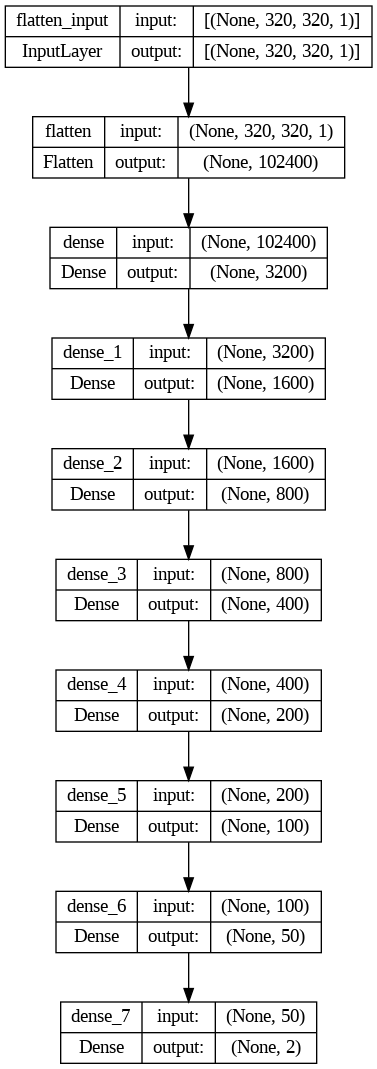

In [40]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Final Model Specification
아래에는 위 전 과정을 거쳐서 최종적으로 선정된 모델을 정의하고 훈련할 것

In [41]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model

# 예측 수행
y_test = model.predict(eval_x)

y_test

44/44 [==============================] - 32s 719ms/step


array([[0.30746928, 0.8932228 ],
       [0.86011094, 0.03390402],
       [0.39949402, 0.05167985],
       ...,
       [0.17751493, 0.39415038],
       [0.19912605, 0.4274289 ],
       [0.90702343, 0.00383148]], dtype=float32)

In [42]:
y_test_pred = []

for pred in y_test:
  # y_test_pred.append(round(-pred[0])+1)
  # y_test_pred.append(round(pred[1]))
  y_test_pred.append(round(((-pred[0]+pred[1]) + 1 ) / 2 ))

# Generate Submission
아래에는 Kaggle에 제출한 결과를 PC에 저장하는 코드를 넣을 것.
노트북 실행 후 아래의 코드를 통해 생성된 결과가 Kaggle에 제출된 결과와 일치해야 함.

In [43]:
SUBMIT = pd.DataFrame({
    'id': SAMPLE.index,
    'label': y_test_pred
})
SUBMIT

,id,label
0,809,1
1,1078,0
2,273,0
3,1978,1
4,2589,1
...,...,...
1381,1649,1
1382,936,0
1383,931,1
1384,1556,1


In [44]:
SUBMIT["label"].value_counts(normalize=True)

label
0    0.506494
1    0.493506
Name: proportion, dtype: float64

In [45]:
SUBMIT.to_csv('./submission.csv', index=False)

In [46]:
!kaggle competitions submit --file submission.csv --message "0609.4 Final Submission" 2024-knu-ml-ind-asmt5

100% 8.94k/8.94k [00:00<00:00, 29.2kB/s]
Successfully submitted to Individual Assignment #5